# CAPSTONE PROJECT-2 : PRCP-1018-BikeRental

## Problem Statement:

**The Primary objective is to build a statistical model to predict the number of bicycls that can be rented with the availability of the data and understand the trends and envirnmental and seasonal factors that may be affecting the rented bike count.**  

Task 1:- Prepare a complete data analysis report on the given data.

Task 2:- Prediction of daily bike rental count based on the environmental and seasonal settings.


### Dataset Description:
Bike sharing systems are a new version of traditional bike rentals where the whole process from membership, rental and return back has been automated. Through these systems, users are easily able to rent a bike from a particular position and return back at another position. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for research. 
Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns the bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. 


### Importing Required Libraries

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
%matplotlib inline

# for warnings
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

### Reading the Dataset

In [2]:
# Reading the dataset using read_csv function

df_daily = pd.read_csv('day.csv')

### Basic Checks

In [3]:
# Displaying the first five rows of the dataset

df_daily.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
# Displaying the last five rows of the dataset

df_daily.tail()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  
726  2114  
727  3095  
728  1341  
729  1796  
730  2729

In [5]:
# Displaying the shape of the dataset

df_daily.shape

(731, 16)

#### OBSERVATION:
**The dataset contains per day bike rental counts with 731 entries and 16 attributes, out of which 15 variables - 14 are independent variables and 1 dependent variables forms part of regression analysis**

In [6]:
# Checking the data types available in the dataset

df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### Domain Analysis:
df_rental_day have the following fields:
- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not
- weekday : day of the week
- workingday : if neither weekend nor holiday, it is 1; otherwise 0.
- weathersit : Weather Conditons as follows:
 - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
 - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 - 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [7]:
# Displaying the basic statistics of the numerical values

df_daily.describe()

instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.544894    0.183051    0.162961    0.142429    0.077498   
min      0.000000    1.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    1.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    1.000000    0.498333    0.486733    0.626667    0.180975   
75%      1.000000    2.000000    0.655417    0.608602    0.730209    0.233214   
max      1.000000    3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

## Data Preprocessing

**Renaming some the features of the dataset for better understanding**

In [8]:
df_daily.rename(columns={"instant":"record_index","dteday":"day_date", "yr":"year", "temp":"norm_temp_daily",
                          "mnth":"month", "weathersit":"weather_sit","windspeed":"norm_windspeed_daily",
                          'casual':'casual_daily',"hum":"norm_humidity_daily", "atemp":"norm_feel_temp_daily", 
                          "registered":"registered_daily", "cnt": "count_daily" }, inplace=True)

In [9]:
df_daily.columns

Index(['record_index', 'day_date', 'season', 'year', 'month', 'holiday',
       'weekday', 'workingday', 'weather_sit', 'norm_temp_daily',
       'norm_feel_temp_daily', 'norm_humidity_daily', 'norm_windspeed_daily',
       'casual_daily', 'registered_daily', 'count_daily'],
      dtype='object')

**Riverting back normalised Temperature values to regular Temperature**

* temp = ((t_max-t_min)*norm_temp)+t_min

* t_max = 39     # Max temperature
* t_min = -8     # Min temperature

* temp= (norm_temp*47)-8

In [10]:
# Converting normalized temperature to regular temperature

temp_daily = (df_daily['norm_temp_daily']*47)-8

# Converting normalized feel temperature to regular feel temperature

feel_temp_daily = (df_daily['norm_feel_temp_daily']*47)-8

In [11]:
# Adding denormalized temperature into the dataframe

df_daily['temp_daily']= temp_daily
df_daily['feel_temp_daily'] = feel_temp_daily

In [12]:
df_daily.head(2)

record_index    day_date  season  year  month  holiday  weekday  \
0             1  2011-01-01       1     0      1        0        6   
1             2  2011-01-02       1     0      1        0        0   

   workingday  weather_sit  norm_temp_daily  norm_feel_temp_daily  \
0           0            2         0.344167              0.363625   
1           0            2         0.363478              0.353739   

   norm_humidity_daily  norm_windspeed_daily  casual_daily  registered_daily  \
0             0.805833              0.160446           331               654   
1             0.696087              0.248539           131               670   

   count_daily  temp_daily  feel_temp_daily  
0          985    8.175849         9.090375  
1          801    9.083466         8.625733

**Riverting back normalised Humidity and Windspeed values to regular values**

- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)

In [13]:
# Converting normalized humidity data to regular humidity

humidity_daily= df_daily['norm_humidity_daily']*100

In [14]:
# Converting normalized windspeed data to regular windspeed

windspeed_daily = df_daily['norm_windspeed_daily']*67

In [15]:
# Adding denormalized Humidity and Windspeed into the dataframe

df_daily['humidity_daily']= humidity_daily
df_daily['windspeed_daily'] = windspeed_daily

In [16]:
df_daily.head(2)

record_index    day_date  season  year  month  holiday  weekday  \
0             1  2011-01-01       1     0      1        0        6   
1             2  2011-01-02       1     0      1        0        0   

   workingday  weather_sit  norm_temp_daily  norm_feel_temp_daily  \
0           0            2         0.344167              0.363625   
1           0            2         0.363478              0.353739   

   norm_humidity_daily  norm_windspeed_daily  casual_daily  registered_daily  \
0             0.805833              0.160446           331               654   
1             0.696087              0.248539           131               670   

   count_daily  temp_daily  feel_temp_daily  humidity_daily  windspeed_daily  
0          985    8.175849         9.090375         80.5833        10.749882  
1          801    9.083466         8.625733         69.6087        16.652113

**Converting some of the continuous features into categorical features for better Data Analysis**

In [17]:
df_daily_eda= df_daily.copy()

In [18]:
df_daily_eda['temp_ranges'] = pd.cut(x=df_daily_eda['temp_daily'], bins=[-8, 4, 8, 13, 18, 25, 29, 33, 41],
                    labels=["Very Cold", 'Cold', 'Cool','Slightly Cool', 'Comfortable','Slightly warm','Warm', 'Hot'], include_lowest=True)

In [19]:
df_daily_eda['year'].replace([0,1],['2011', '2012'], inplace=True)

df_daily_eda['season'].replace([1,2,3,4],['Winter', 'Spring', 'Summer', 'Fall'], inplace=True)

df_daily_eda['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['January','February','March','April','May', 
                                                              'June','July','August','September', 'October',
                                                              'November', 'December'], inplace=True)

df_daily_eda['weekday'].replace([0,1,2,3,4,5,6],["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"], 
                                inplace=True)

df_daily_eda['holiday'].replace([0,1],['No Holiday', 'Holiday'], inplace=True)

df_daily_eda['workingday'].replace([0,1],["No Working Day","Working Day"], inplace=True)

df_daily_eda['weather_sit'].replace([1,2,3,4],['Clear/Partly Cloudy', 'Mist/Cloudy', 'Light Snow/Rain', 
                                               'Heavy Rain/Snow/Storm'], inplace=True)

df_daily_eda.head()

record_index    day_date  season  year    month     holiday    weekday  \
0             1  2011-01-01  Winter  2011  January  No Holiday   Saturday   
1             2  2011-01-02  Winter  2011  January  No Holiday     Sunday   
2             3  2011-01-03  Winter  2011  January  No Holiday     Monday   
3             4  2011-01-04  Winter  2011  January  No Holiday    Tuesday   
4             5  2011-01-05  Winter  2011  January  No Holiday  Wednesday   

       workingday          weather_sit  norm_temp_daily  ...  \
0  No Working Day          Mist/Cloudy         0.344167  ...   
1  No Working Day          Mist/Cloudy         0.363478  ...   
2     Working Day  Clear/Partly Cloudy         0.196364  ...   
3     Working Day  Clear/Partly Cloudy         0.200000  ...   
4     Working Day  Clear/Partly Cloudy         0.226957  ...   

   norm_humidity_daily  norm_windspeed_daily  casual_daily  registered_daily  \
0             0.805833              0.160446           331               654   
1             0.696087              0.248539           131               670   
2             0.437273              0.248309           120              1229   
3             0.590435              0.160296           108              1454   
4             0.436957              0.186900            82              1518   

   count_daily  temp_daily  feel_temp_daily  humidity_daily  windspeed_daily  \
0          985    8.175849         9.090375         80.5833        10.749882   
1          801    9.083466         8.625733         69.6087        16.652113   
2         1349    1.229108         0.902035         43.7273        16.636703   
3         1562    1.400000         1.969734         59.0435        10.739832   
4         1600    2.666979         2.775690         43.6957        12.522300   

   temp_ranges  
0         Cool  
1         Cool  
2    Very Cold  
3    Very Cold  
4    Very Cold  

[5 rows x 21 columns]

In [20]:
# To see the Distribution of Categorical features

df_daily_eda.describe(include="O") 

day_date  season  year    month     holiday   weekday   workingday  \
count          731     731   731      731         731       731          731   
unique         731       4     2       12           2         7            2   
top     2011-01-01  Summer  2012  January  No Holiday  Saturday  Working Day   
freq             1     188   366       62         710       105          500   

                weather_sit  
count                   731  
unique                    3  
top     Clear/Partly Cloudy  
freq                    463

## Exploratory Data Analysis

In [21]:
df_daily_eda.info() # To know the types of data for each features 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   record_index          731 non-null    int64   
 1   day_date              731 non-null    object  
 2   season                731 non-null    object  
 3   year                  731 non-null    object  
 4   month                 731 non-null    object  
 5   holiday               731 non-null    object  
 6   weekday               731 non-null    object  
 7   workingday            731 non-null    object  
 8   weather_sit           731 non-null    object  
 9   norm_temp_daily       731 non-null    float64 
 10  norm_feel_temp_daily  731 non-null    float64 
 11  norm_humidity_daily   731 non-null    float64 
 12  norm_windspeed_daily  731 non-null    float64 
 13  casual_daily          731 non-null    int64   
 14  registered_daily      731 non-null    int64   
 15  count_

### Distribution plot for Numerical Features

In [22]:
df_eda_dist = df_daily_eda[['humidity_daily', 'windspeed_daily', 'casual_daily', 'registered_daily',
                            'count_daily', 'temp_daily','feel_temp_daily']]

<Figure size 432x288 with 0 Axes>

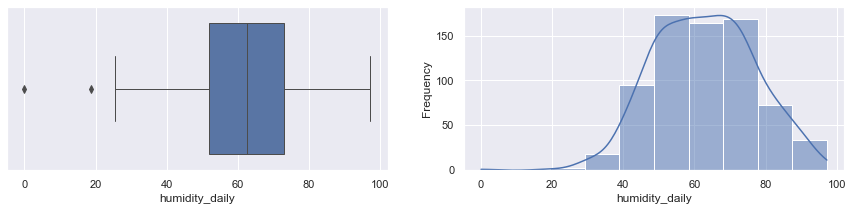

<Figure size 1080x216 with 0 Axes>

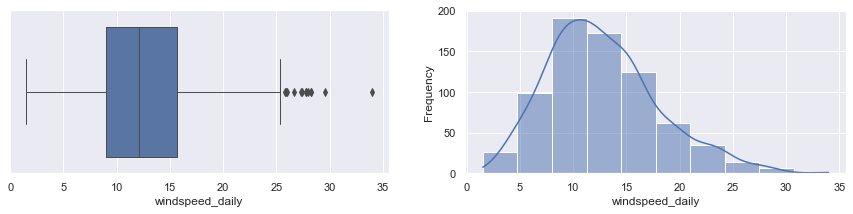

<Figure size 1080x216 with 0 Axes>

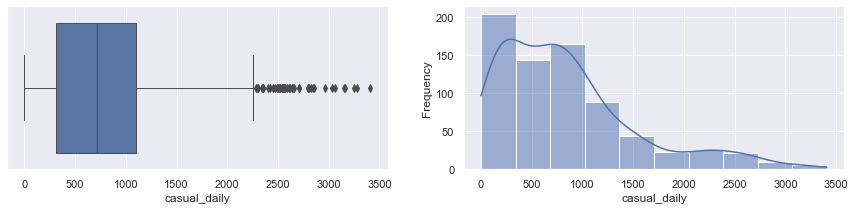

<Figure size 1080x216 with 0 Axes>

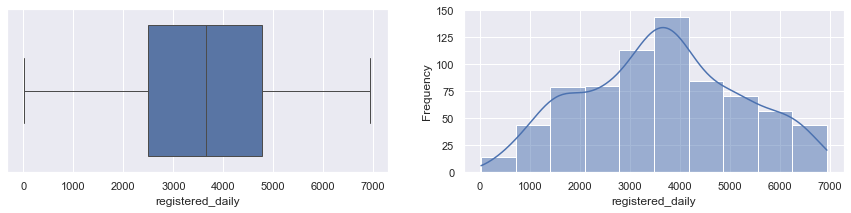

<Figure size 1080x216 with 0 Axes>

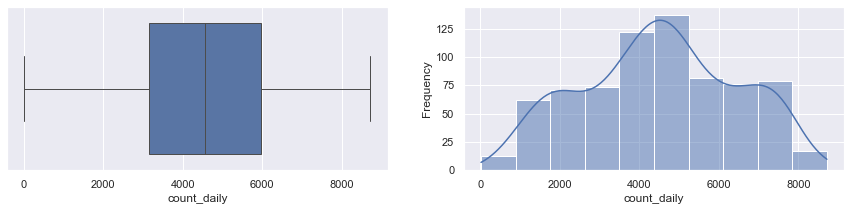

<Figure size 1080x216 with 0 Axes>

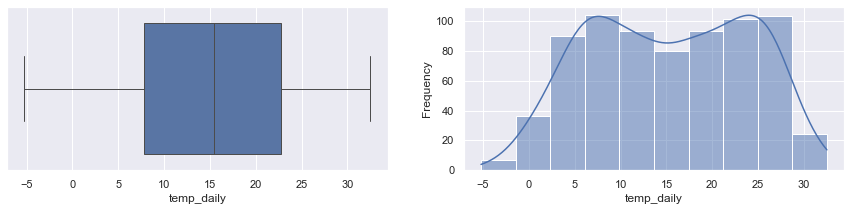

<Figure size 1080x216 with 0 Axes>

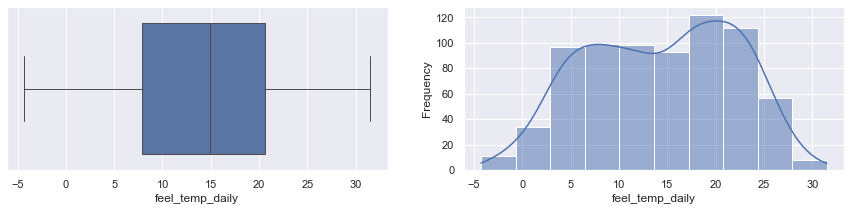

In [23]:
for i in df_eda_dist.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(15,3)})
    
    f, (ax_box, ax_hist) = plt.subplots(1,2, sharex=True)
    plt.gca().set(xlabel = i, ylabel='Frequency')
    sns.boxplot(df_eda_dist[i], ax=ax_box, linewidth = 1.0)
    sns.histplot(df_eda_dist[i], ax=ax_hist, bins= 10, kde=True)
    plt.show()

#### OBSERVATION:
 - causal_daily is postively skewed.
 - windspeed_daily is moderately skewed towards right.
 - remaining features are fairly symmetrical.

### Count of Bike Rentals on Yearly basis 

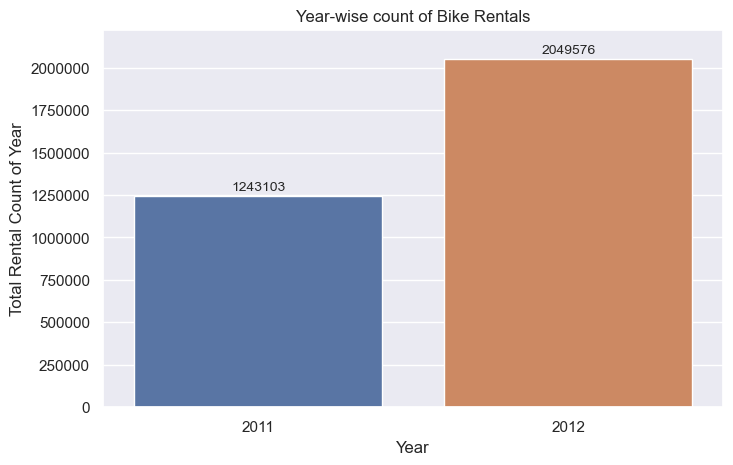

In [24]:
plt.figure(figsize=(8,5),dpi=100)

ax= sns.barplot(data=df_daily_eda,x="year", y="count_daily", estimator=sum,  errwidth=0)
ax.set(title= "Year-wise count of Bike Rentals", ylabel='Total Rental Count of Year', xlabel='Year')

plt.ticklabel_format(style='plain', axis='y')

for i in ax.containers:
    ax.bar_label(i, fmt = '%d', padding=1.8, fontsize=10)

#### OBSERVATION:
 - The demand for number of rental bikes are more in the year 2012.
 - Total bike rental count in 2011 is 1,243,103 and in 2012 is 2,049,576.

### Monthly Count of Bike Rentals in 2011 and 2012 

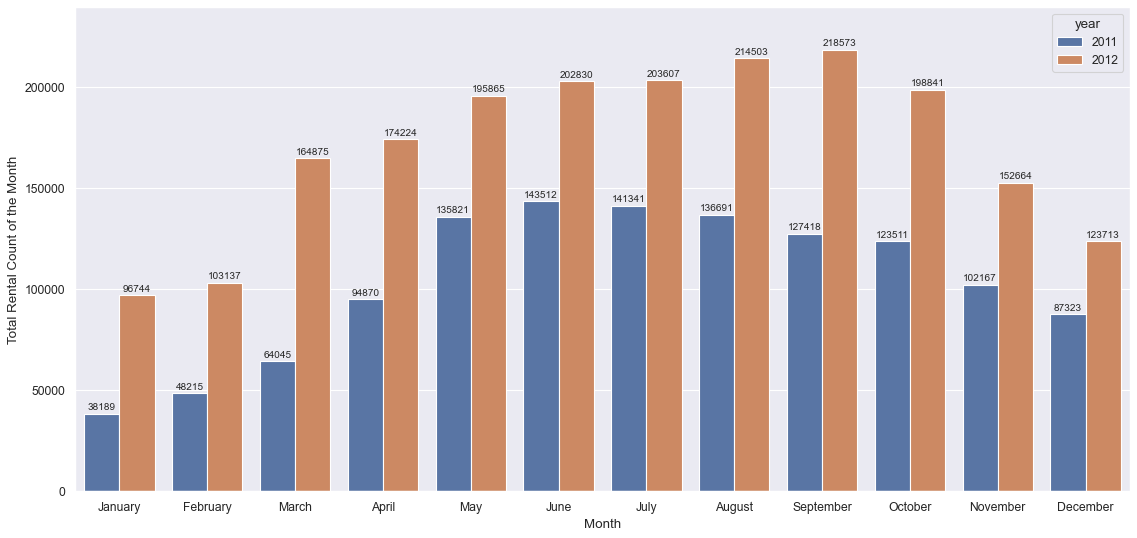

In [25]:
plt.figure(figsize=(17,8),dpi=80)

ax= sns.barplot(data=df_daily_eda,x="month", y="count_daily", hue='year', estimator=sum,  errwidth=0)

ax.set(ylabel='Total Rental Count of the Month', xlabel='Month')

for i in ax.containers:
    ax.bar_label(i, padding=1.8, fontsize=9)

#### OBSERVATION:
 - The demand for the Number of rental bikes increases month by month and shows a decline from October month.
 - June, July, and August show high rental demand in both years.

### Percentage of Total Count Month-wise

In [26]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(values=df_daily_eda.query("year=='2011'")['count_daily'], labels=df_daily_eda.query("year=='2011'")['month']),
              1, 1)
fig.add_trace(go.Pie(values=df_daily_eda.query("year=='2012'")['count_daily'], labels=df_daily_eda.query("year=='2012'")['month']),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.3, hoverinfo="label+percent")
fig.update_layout(
    title_text=" Percentage Demand of Rental bikes month on month",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='2011', x=0.175, y=0.5, font_size=20, showarrow=False),
                 dict(text='2012', x=0.825, y=0.5, font_size=20, showarrow=False)])

### Season-wise Count of Rental Bikes in Year 2011 and 2012

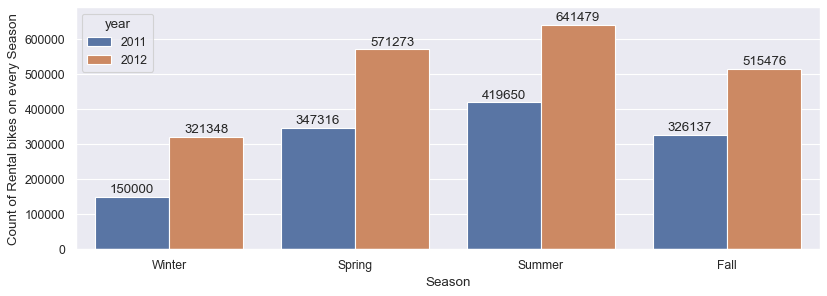

In [27]:
plt.figure(figsize=(12,4),dpi=80)

ax= sns.barplot(data=df_daily_eda, x="season", y="count_daily", hue='year', estimator=sum, errwidth=0)

ax.set(ylabel='Count of Rental bikes on every Season', xlabel='Season')

for i in ax.containers:
    ax.bar_label(i, padding=1.0)

#### OBSERVATION:
 - The demand for the rental bike is generally low in Winter season and high in Summer season.

### Percentage of Total Count Season-wise

In [28]:

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(values=df_daily_eda.query("year=='2011'")['count_daily'], labels=df_daily_eda.query("year=='2011'")['season']),
              1, 1)
fig.add_trace(go.Pie(values=df_daily_eda.query("year=='2012'")['count_daily'], labels=df_daily_eda.query("year=='2012'")['season']),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.3, hoverinfo="label+percent")
fig.update_layout(
    title_text="Percentage Demand of Rental Bikes on Every Season",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='2011',x=0.175, y=0.5,  font_size=20, showarrow=False),
                 dict(text='2012', x=0.825, y=0.5, font_size=20, showarrow=False)])

### Average Daily Demand of Rental Bikes on Holiday and Working Days

[Text(0, 0.5, 'Avg Demand by Registered member'), Text(0.5, 0, '')]

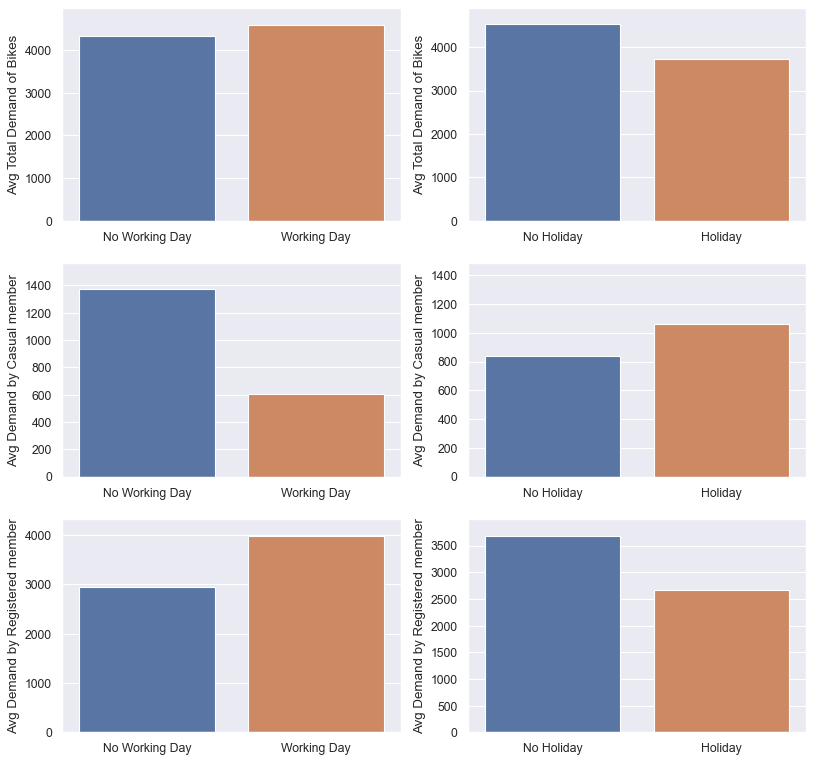

In [29]:
fig, ax = plt.subplots(3,2, figsize=(12, 12),dpi=80)

sns.barplot(x="workingday",  y="count_daily", data=df_daily_eda,errwidth=0, ax=ax[0,0]).set(ylabel='Avg Total Demand of Bikes', xlabel='')
sns.barplot(x="holiday",  y="count_daily", data=df_daily_eda, errwidth=0, ax=ax[0, 1]).set(ylabel='Avg Total Demand of Bikes', xlabel='')

sns.barplot(x="workingday",  y="casual_daily", data=df_daily_eda,errwidth=0, ax=ax[1,0]).set(ylabel='Avg Demand by Casual member', xlabel='')
sns.barplot(x="holiday",  y="casual_daily", data=df_daily_eda, errwidth=0, ax=ax[1, 1]).set(ylabel='Avg Demand by Casual member', xlabel='')

sns.barplot(x="workingday",  y="registered_daily", data=df_daily_eda,errwidth=0, ax=ax[2,0]).set(ylabel='Avg Demand by Registered member', xlabel='')
sns.barplot(x="holiday",  y="registered_daily", data=df_daily_eda, errwidth=0, ax=ax[2, 1]).set(ylabel='Avg Demand by Registered member', xlabel='')

#### OBSERVATION:
 - Demand by Casual users for bike rental is higher on non-working days and holiday.
 - Demand by Registered user for bike rental is higher on working days.

### Average Demand of Rental Bikes on Weekdays

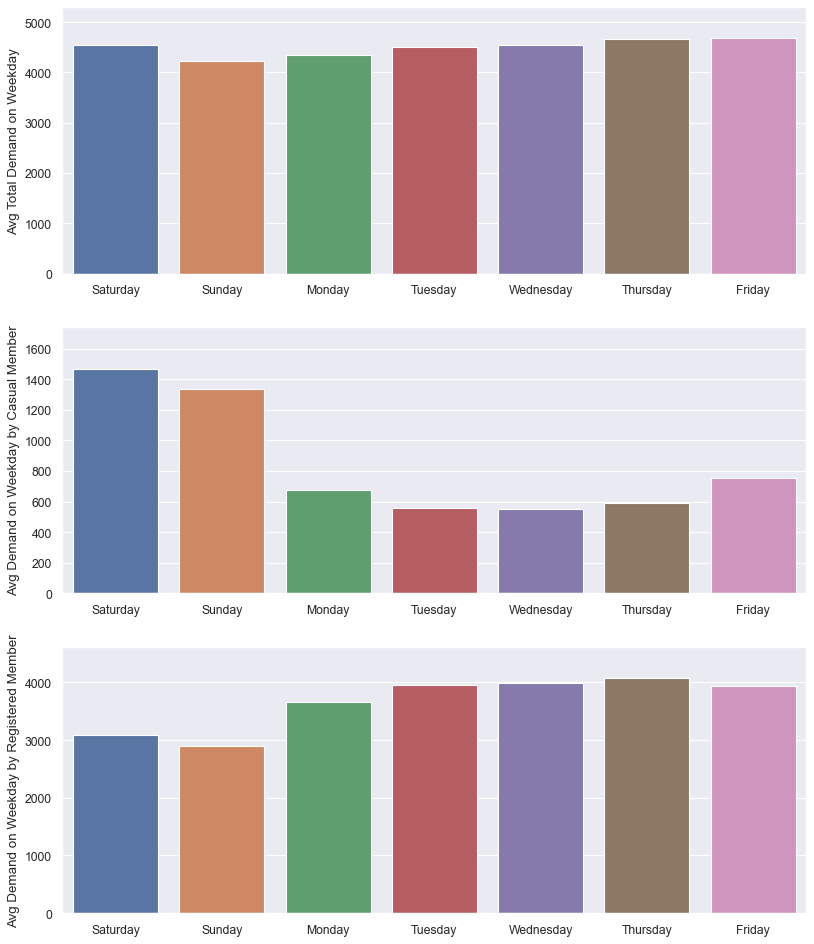

In [30]:
fig, axs = plt.subplots(3,1, figsize=(12, 15),dpi=80)

sns.barplot(x="weekday",  y="count_daily", data=df_daily_eda, errwidth=0, ax=axs[0]).set(ylabel='Avg Total Demand on Weekday', xlabel='')

sns.barplot(x="weekday",  y="casual_daily", data=df_daily_eda, errwidth=0, ax=axs[1]).set(ylabel='Avg Demand on Weekday by Casual Member', xlabel='')

ax=sns.barplot(x="weekday",  y="registered_daily", data=df_daily_eda, errwidth=0, ax=axs[2]).set(ylabel='Avg Demand on Weekday by Registered Member', xlabel='')

#### OBSERVATION:
 - The average total demand of rental bikes is approximately same on all days.
 - The casual members use rental bikes more on saturdays and sundays compared to other days. 
 - The registered members use rental bikes more on working days as compared to weekdays.

## Average Daily Rental Counts according to weather condition

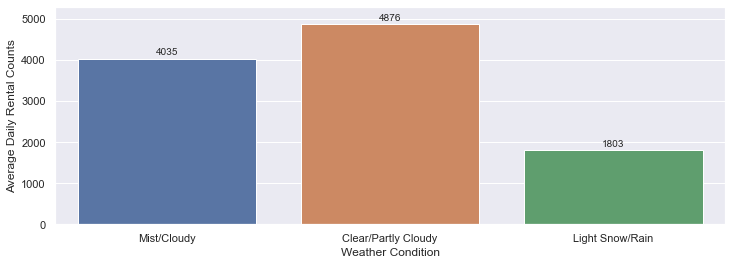

In [31]:
plt.figure(figsize=(12,4))
ax= sns.barplot(x="weather_sit",  y="count_daily", data=df_daily_eda, errwidth=0)
ax.set(ylabel='Average Daily Rental Counts', xlabel='Weather Condition')
for i in ax.containers:
    ax.bar_label(i, fmt = '%d', padding=1.8, fontsize=10)

#### OBSERVATION:
 - Users tend to rent bike more in Clear/Partly Cloudy weather condition.
 - Demand falls in Light Snow/Rainy weather conditions.
 - Mist/Cloudy weather condition does not impact bike rental count as much.

## Bike Rental Counts according to Temperature Ranges

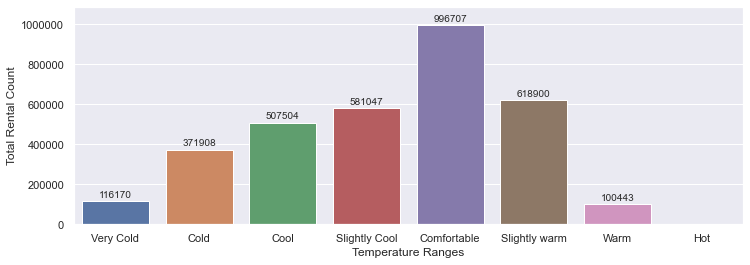

In [32]:
plt.figure(figsize=(12,4))
ax= sns.barplot(data=df_daily_eda, x="temp_ranges", y="count_daily" , estimator =sum, errwidth=0)
ax.set(ylabel='Total Rental Count', xlabel='Temperature Ranges')
plt.ticklabel_format(style='plain', axis='y')
for i in ax.containers:
    ax.bar_label(i, fmt = '%d', padding=1.8, fontsize=10)

**Temperature Ranges**

- Below 4.1 --- Very Cold
- 4.1 to 8.0 --- Cold
- 8.1 to 13.0 --- Cool
- 13.1 to 18.0 --- Slightly Cool
- 18.1 to 25.0 --- Comfortable
- 25.1 to 29.0 --- Slightly Warm
- 29.1 to 33.0 --- Warm
- 33.1 to 41.0 --- Hot

#### OBSERVATION:
 - Demand for bike rentals drops in extreme tempratures(Very cold, warm and hot).
 - Comfortable temprature range shows high demands.

## Density Plot for Rental Counts

In [33]:
df_daily_eda[df_daily_eda['year']=='2012'].describe()

record_index  norm_temp_daily  norm_feel_temp_daily  \
count    366.000000       366.000000            366.000000   
mean     548.500000         0.504081              0.481852   
std      105.799338         0.176112              0.156756   
min      366.000000         0.107500              0.101658   
25%      457.250000         0.347708              0.350685   
50%      548.500000         0.514167              0.497779   
75%      639.750000         0.653959              0.607646   
max      731.000000         0.861667              0.804913   

       norm_humidity_daily  norm_windspeed_daily  casual_daily  \
count           366.000000            366.000000    366.000000   
mean              0.612166              0.189572   1018.483607   
std               0.134206              0.078194    758.989897   
min               0.254167              0.046650      2.000000   
25%               0.508125              0.133721    429.750000   
50%               0.611875              0.174750    904.500000   
75%               0.711146              0.231196   1262.000000   
max               0.925000              0.441563   3410.000000   

       registered_daily  count_daily  temp_daily  feel_temp_daily  \
count        366.000000   366.000000  366.000000       366.000000   
mean        4581.450820  5599.934426   15.691798        14.647048   
std         1424.331846  1788.667868    8.277270         7.367531   
min           20.000000    22.000000   -2.947500        -3.222074   
25%         3730.500000  4369.000000    8.342288         8.482219   
50%         4776.500000  5927.000000   16.165849        15.395636   
75%         5663.000000  7011.250000   22.736050        20.559386   
max         6946.000000  8714.000000   32.498349        29.830911   

       humidity_daily  windspeed_daily  
count      366.000000       366.000000  
mean        61.216645        12.701344  
std         13.420576         5.238985  
min         25.416700         3.125550  
25%         50.812525         8.959307  
50%         61.187500        11.708250  
75%         71.114600        15.490115  
max         92.500000        29.584721

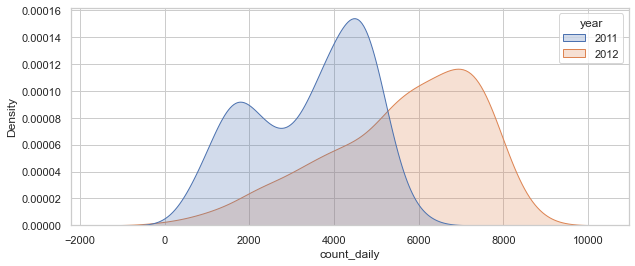

In [34]:
plt.figure(figsize=(10,4))
sns.set_style("whitegrid")
ax = sns.kdeplot(df_daily_eda['count_daily'], hue=df_daily_eda['year'], shade=True)
plt.show()

#### OBSERVATION:
 - Most of the days in 2011 show around 4000-5000 daily average rental counts.
 - Most of the days in 2012 show around 7000 daily average rental counts.

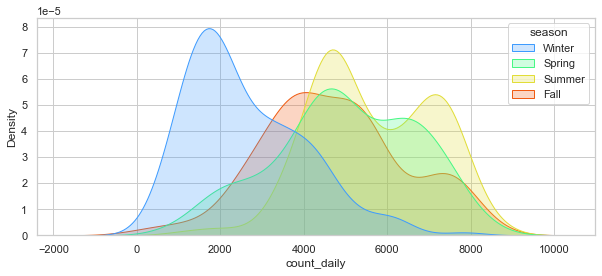

In [35]:
plt.figure(figsize=(10,4))
sns.set_style("whitegrid")
ax = sns.kdeplot(df_daily_eda['count_daily'], hue=df_daily_eda['season'], shade=True, palette='turbo')
plt.show()

#### OBSERVATION:
 - Most of the days in Winter show around 1500-1700 daily average rental counts.
 - Most of the days in Spring show around 4000-5000 daily average rental counts.
 - Most of the days in Summer show around 4000-5000 daily average rental counts.
 - Most of the days in Fall show around 4000 daily average rental counts.

### Demand for rental bikes based on Temperature and Feel Temperature

In [36]:
df_daily_eda.columns

Index(['record_index', 'day_date', 'season', 'year', 'month', 'holiday',
       'weekday', 'workingday', 'weather_sit', 'norm_temp_daily',
       'norm_feel_temp_daily', 'norm_humidity_daily', 'norm_windspeed_daily',
       'casual_daily', 'registered_daily', 'count_daily', 'temp_daily',
       'feel_temp_daily', 'humidity_daily', 'windspeed_daily', 'temp_ranges'],
      dtype='object')

In [37]:
import plotly.express as px

fig = px.scatter(df_daily_eda.query("year=='2011'"), x="temp_daily", y="count_daily",
                 size="humidity_daily", color="season",
                 hover_name="day_date", log_x=True, size_max=12)
fig.show()

In [38]:
import plotly.express as px

fig = px.scatter(df_daily_eda.query("year=='2012'"), x="temp_daily", y="count_daily",
                 size="humidity_daily", color="season",
                 hover_name="day_date", log_x=True, size_max=12)
fig.show()

In [39]:
import plotly.graph_objects as go
import plotly.figure_factory as ff

table_data = df_daily_eda.groupby(by='season')['casual_daily', 'registered_daily', 'count_daily'].sum().reset_index()
table_data.rename(columns={"casual_daily":'casual', "registered_daily":"registered", 
                           "count_daily":"total"}, inplace=True)

fig=ff.create_table(table_data, height_constant=60)


trace1 = go.Scatter(x=table_data['season'], y=table_data['casual'],
                    marker=dict(color='#0099ff'),
                    name='Casual Rentals',
                    xaxis='x2', yaxis='y2')
trace2 = go.Scatter(x=table_data['season'], y=table_data['registered'],
                    marker=dict(color='#404040'),
                    name='Registered Rentals',
                    xaxis='x2', yaxis='y2')
trace3 = go.Scatter(x=table_data['season'], y=table_data['total'],
                    marker=dict(color='#FF0000'),
                    name='Total Rentals',
                    xaxis='x2', yaxis='y2')

fig.add_traces([trace1, trace2, trace3])

# initialize xaxis2 and yaxis2
fig['layout']['xaxis2'] = {}
fig['layout']['yaxis2'] = {}

# Edit layout for subplots
fig.layout.xaxis.update({'domain': [0, .5]})
fig.layout.xaxis2.update({'domain': [0.6, 1.0]})

# The graph's yaxis MUST BE anchored to the graph's xaxis
fig.layout.yaxis2.update({'anchor': 'x2'})
fig.layout.yaxis2.update({'title': 'Rental Count'})

# Update the margins to add a title and see graph x-labels.
fig.layout.margin.update({'t':50, 'b':100})
fig.layout.update({'title': 'Season-Wise Bike Rentals'})

fig.show()

#### OBSERVATION:
- In total rental count, registered members contribute more than casual member

### Demand for rental bikes based on Humidity 

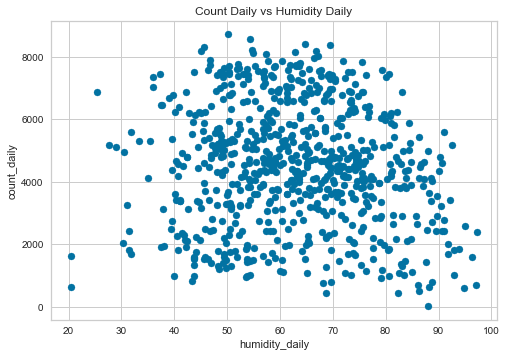

In [143]:
plt.scatter( df_daily['humidity_daily'], df_daily['count_daily'])
plt.xlabel('humidity_daily')
plt.ylabel('count_daily')
plt.title('Count Daily vs Humidity Daily')
plt.show()

### Demand for rental bikes based on Windspeed

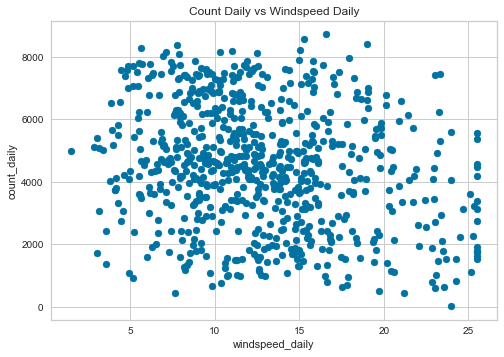

In [144]:
plt.scatter(df_daily['windspeed_daily'],df_daily['count_daily'])
plt.xlabel('windspeed_daily')
plt.ylabel('count_daily')
plt.title('Count Daily vs Windspeed Daily')
plt.show()

### Checking for Missing Values

In [40]:
df_daily.isnull().sum()

record_index            0
day_date                0
season                  0
year                    0
month                   0
holiday                 0
weekday                 0
workingday              0
weather_sit             0
norm_temp_daily         0
norm_feel_temp_daily    0
norm_humidity_daily     0
norm_windspeed_daily    0
casual_daily            0
registered_daily        0
count_daily             0
temp_daily              0
feel_temp_daily         0
humidity_daily          0
windspeed_daily         0
dtype: int64

- There are no Missing Values

### Dropping Unnecessary Columns

In [41]:
df_daily.drop(columns=['norm_temp_daily',
       'norm_feel_temp_daily', 'norm_humidity_daily', 'norm_windspeed_daily',
       'casual_daily', 'registered_daily',"record_index","day_date"], inplace=True)

### Handling Outliers

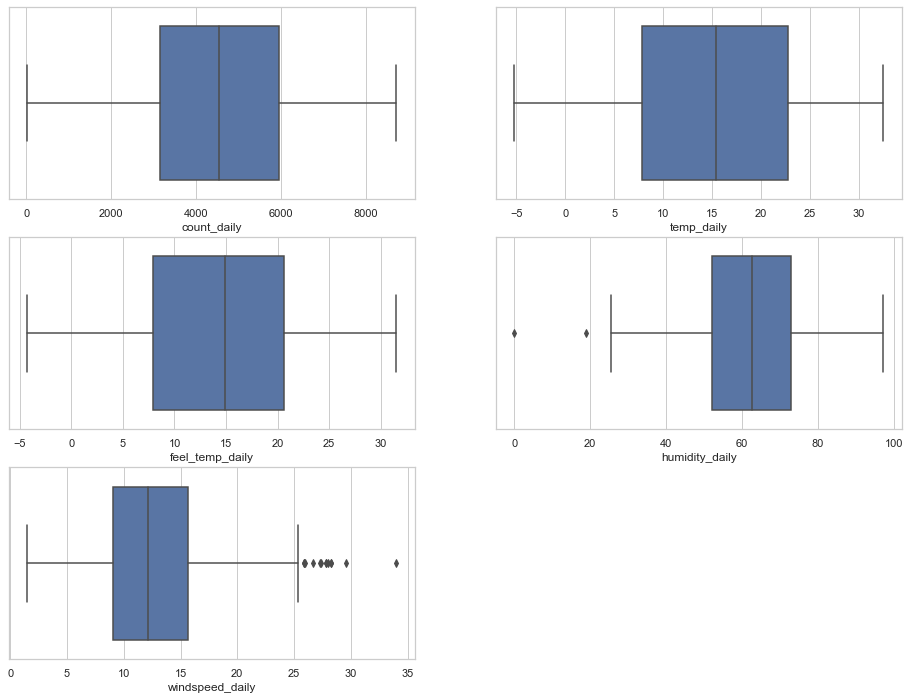

<Figure size 1080x216 with 0 Axes>

In [42]:
plt.figure(figsize=(16,12))
plotnumber = 1
for i in df_daily[['count_daily', 'temp_daily', 'feel_temp_daily',
       'humidity_daily', 'windspeed_daily']]:
  plt.subplot(3,2,plotnumber)
  sns.boxplot(x=i,data=df_daily)
  plotnumber += 1
plt.show()
plt.tight_layout()

Only windspeed_daily and humidity_daily show outliers.

### Outlier Treatment

In [43]:
def find_boundaries(variable):
    
    q1 = df_daily[variable].quantile(0.25)
    q3 = df_daily[variable].quantile(0.75)
    iqr = q3 - q1
    lower_range = q1 - 1.5 * iqr # used to find the minimum value
    upper_range = q3 + 1.5 * iqr # used to find the maximum value
    return lower_range, upper_range

In [44]:
# cap the outlier / censoring the outlier
lower_hum, upper_hum = find_boundaries('humidity_daily')

print(lower_hum)
print('-'*100)
print(upper_hum)

20.468725000000006
----------------------------------------------------------------------------------------------------
104.55212499999999


In [45]:
df_daily.humidity_daily = np.where(df_daily.humidity_daily > upper_hum, upper_hum, df_daily.humidity_daily)
df_daily.humidity_daily = np.where(df_daily.humidity_daily < lower_hum, lower_hum, df_daily.humidity_daily)

In [46]:
# cap the outlier / censoring the outlier
lower_wind, upper_wind = find_boundaries('windspeed_daily')

In [47]:
df_daily.windspeed_daily = np.where(df_daily.windspeed_daily > upper_wind, upper_wind, df_daily.windspeed_daily)
df_daily.windspeed_daily = np.where(df_daily.windspeed_daily < lower_wind, lower_wind, df_daily.windspeed_daily)

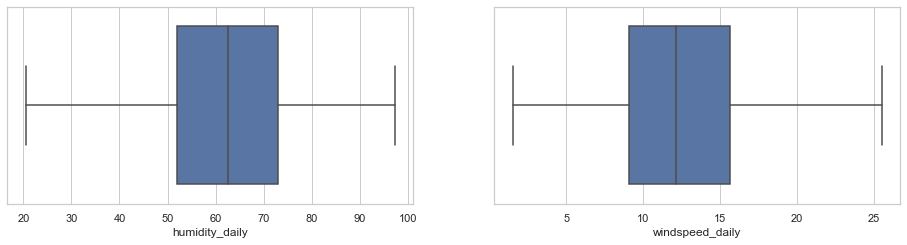

<Figure size 1080x216 with 0 Axes>

In [48]:
plt.figure(figsize=(16,8))
plotnumber = 1
for i in df_daily[['humidity_daily', 'windspeed_daily']]:
  plt.subplot(2,2,plotnumber)
  sns.boxplot(x=i,data=df_daily)
  plotnumber += 1
plt.show()
plt.tight_layout()

## Checking for Correlation using Heatmap

<AxesSubplot:>

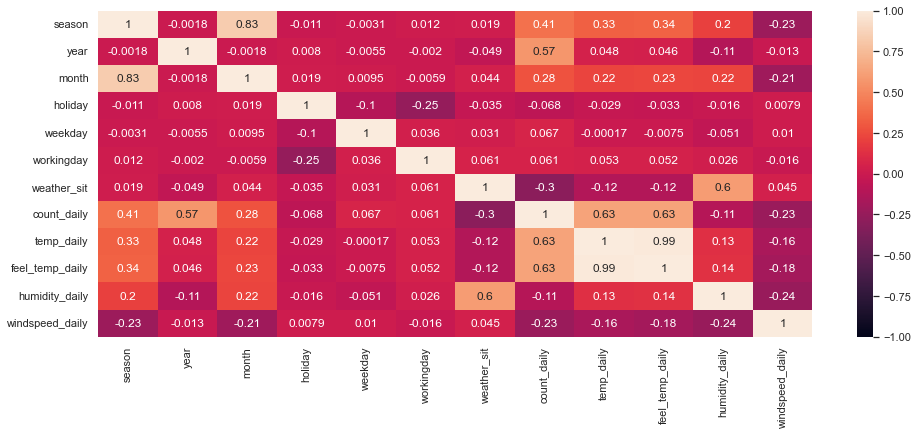

In [49]:
plt.figure(figsize=(16,6))
sns.heatmap(df_daily.corr(), annot=True, vmin=-1, vmax=1)

- All the features have significant relation(both positive and negative) with count_daily.
- There is no need to drop any feature.

**Rearanging Columns**

In [50]:
df_daily = df_daily[['season', 'year', 'month', 'holiday', 'weekday', 'workingday','weather_sit','temp_daily',
                     'feel_temp_daily','humidity_daily', 'windspeed_daily','count_daily']]

In [51]:
df_daily.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather_sit', 'temp_daily', 'feel_temp_daily', 'humidity_daily',
       'windspeed_daily', 'count_daily'],
      dtype='object')

### Scaling the Data

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
std = StandardScaler()

In [54]:
scaled_daily = std.fit_transform(df_daily)

In [55]:
scaled_daily

array([[-1.34821315, -1.00136893, -1.60016072, ...,  1.2578357 ,
        -0.3889267 , -1.81795256],
       [-1.34821315, -1.00136893, -1.60016072, ...,  0.48072718,
         0.77644681, -1.91299949],
       [-1.34821315, -1.00136893, -1.60016072, ..., -1.35192787,
         0.77340416, -1.62992496],
       ...,
       [-1.34821315,  0.99863295,  1.58866019, ...,  0.88313891,
        -0.86600053, -1.63405743],
       [-1.34821315,  0.99863295,  1.58866019, ..., -1.02577824,
         2.12863884, -1.39902293],
       [-1.34821315,  0.99863295,  1.58866019, ..., -0.35898421,
        -0.46300854, -0.91707305]])

In [56]:
scaled_df_daily= pd.DataFrame(data = scaled_daily, columns = df_daily.columns)

In [57]:
scaled_df_daily.head()

season      year     month   holiday   weekday  workingday  weather_sit  \
0 -1.348213 -1.001369 -1.600161 -0.171981  1.498809   -1.471225     1.110427   
1 -1.348213 -1.001369 -1.600161 -0.171981 -1.496077   -1.471225     1.110427   
2 -1.348213 -1.001369 -1.600161 -0.171981 -0.996930    0.679706    -0.726048   
3 -1.348213 -1.001369 -1.600161 -0.171981 -0.497782    0.679706    -0.726048   
4 -1.348213 -1.001369 -1.600161 -0.171981  0.001366    0.679706    -0.726048   

   temp_daily  feel_temp_daily  humidity_daily  windspeed_daily  count_daily  
0   -0.826662        -0.679946        1.257836        -0.388927    -1.817953  
1   -0.721095        -0.740652        0.480727         0.776447    -1.912999  
2   -1.634657        -1.749767       -1.351928         0.773404    -1.629925  
3   -1.614780        -1.610270       -0.267392        -0.390911    -1.519898  
4   -1.467414        -1.504971       -1.354165        -0.038969    -1.500269

### Splitting the data into training and test sets

In [58]:
# Importing Necessary Libraries
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols

In [59]:
# Independent and dependent variable creation

X=scaled_df_daily.iloc[:, :-1] ## X variable contains all inputs

y=scaled_df_daily.count_daily ## y is output

In [60]:
X = scaled_df_daily.drop('count_daily',axis=1)
y = scaled_df_daily['count_daily']

In [61]:
# Traning and testing data creation

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=35)

## Model Building

## Model-1: Linear Regression Model

In [62]:
# Importing the Linear Regression model library

from sklearn.linear_model import LinearRegression

LR=LinearRegression() # object creation

LR.fit(X_train,y_train) # training of linear regression

y_predict=LR.predict(X_test) # predict using test data

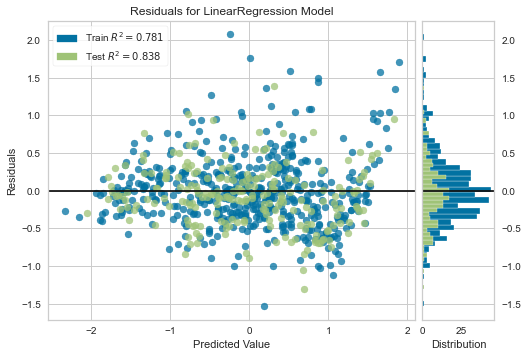

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [66]:
# Ploting residual plot of actual and predicted values

from yellowbrick.regressor import ResidualsPlot

model = LinearRegression()

visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data

visualizer.show()                 # Finalize and render the figure

### Linear Regression Model Evaluation

In [67]:
# Predicting using train dataset

y_train_predict = LR.predict(X_train)

array([ 0.6116641 , -0.39899115,  0.42725217, -0.31759909,  0.93307745,
        0.83460038,  0.53601073,  0.87113935, -0.28117348, -0.59374032,
        0.0714046 ,  1.07402392, -0.11551741,  0.34788688,  0.11662809,
       -0.18711256,  0.01037907,  0.49397294, -1.36219853, -1.60572504,
       -1.71861873, -0.83397229, -0.97309634, -0.84492539,  0.41235408,
        0.80048804,  0.43418479, -0.08439253,  0.27669428,  1.20980301,
        0.9115585 , -0.39425464, -0.85427407,  0.09146835,  0.50700712,
       -1.68285668, -0.96623596, -1.32578252,  0.06660423,  0.52710897,
       -1.18709117, -0.08982129, -0.16475256, -0.81203504, -1.33774396,
       -1.12813684, -1.01951129, -1.28152009,  0.18434619, -1.37002465,
        1.26432989, -1.84682893, -1.69546906, -0.27095921, -0.57408555,
        0.9136954 ,  0.51060413,  0.30969023, -0.58162722, -1.30334425,
        1.411669  ,  0.43249495, -0.93121608,  0.44476809,  0.77874557,
        0.65219794, -1.28931591, -1.62798507, -0.5123111 , -1.22

In [73]:
# Model Evaluation using R2 Score, Mean Squared Error and Mean Absolute Error

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math

In [69]:
# Test R2 Score

LR_test_r2 = r2_score(y_test,y_predict)
LR_test_r2

0.8377937669585337

In [70]:
# Train R2 Score

LR_train_score = r2_score(y_train,y_train_predict)
LR_train_score

0.7811463942424343

In [71]:
X_test.shape

(220, 11)

In [79]:
# Adjusted R2 Score for Linear Regression

adjusted_r2 = 1 - (((1-LR_test_r2)*(220-1))/(220-10-1))
adjusted_r2

0.8300327031766453

In [74]:
# Root Mean Squared Error

print(mean_squared_error(y_test,y_predict))
print(math.sqrt(mean_squared_error(y_test,y_predict)))

0.16553120294214352
0.40685526043317116


In [75]:
# Mean Absolute Error

print(mean_absolute_error(y_test,y_predict))

0.3140785281204785


## Model-2: Decision Tree Model

In [76]:
# Importing Desicion Tress Regressor model library
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()

In [77]:
DT.fit(X_train,y_train) # training using train data

DecisionTreeRegressor()

In [78]:
DT_y_test_predict = DT.predict(X_test) # Predict using test data

### Decision Tree Model Evaluation

In [82]:
# Model Evaluation using R2 Score
DT_test_r2 = r2_score(y_test,DT_y_test_predict)
DT_test_r2

0.8176516512533981

In [83]:
# Predicting using train dataset
DT_y_train_predict = DT.predict(X_train)

DT_train_r2_score = r2_score(y_train,DT_y_train_predict) # Model Evaluation using R2 Score
DT_train_r2_score

1.0

### Hyperparameter Tunning in Decision Tree Regressor

In [84]:
# Various parameter available in Decision Tree Regressor 

DT.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [85]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
          'min_samples_leaf': [ 2,  4,  6,  8, 10,  12,  14,  16,  18,  20],
          'min_samples_split': [ 2, 4, 6, 8, 10, 12, 13, 14, 16, 18, 20],
          "min_weight_fraction_leaf":[0.0,0.2,0.4],
          'random_state': [35,42],
          'splitter': ['best', 'random'],
          "max_leaf_nodes":[None, 20, 40,60,80] }
              

from sklearn.model_selection import ParameterGrid
param_size = ParameterGrid(params)
len(param_size)

66000

{'max_depth': 7, 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 20, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'random'}

In [87]:
DT_tuned=DecisionTreeRegressor(max_depth=7, max_leaf_nodes= None, min_samples_leaf=2, min_samples_split=20, min_weight_fraction_leaf= 0.0, random_state=42, splitter='random')
DT_tuned.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=2, min_samples_split=20,
                      random_state=42, splitter='random')

In [88]:
# Predict using train data

DT_tuned_y_train_predict = DT_tuned.predict(X_train)

In [93]:
# Train data R2 Score

DT_tuned_r2_value_train = r2_score(y_train, DT_tuned_y_train_predict)
DT_tuned_r2_value_train

0.8810753737121069

In [90]:
# Predict using test data

DT_tuned_y_test_predict = DT_tuned.predict(X_test)

In [91]:
# Test data R2 Score

DT_tuned_r2_value_test = r2_score(y_test, DT_tuned_y_test_predict)
DT_tuned_r2_value_test

0.8321080649890882

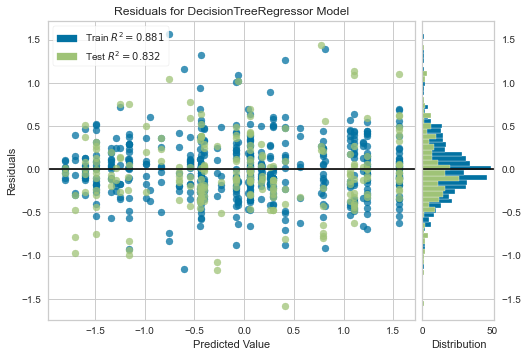

<AxesSubplot:title={'center':'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [92]:
# Residual Plot 
visualizer = ResidualsPlot(DT_tuned)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

## Model-3: Support Vector Regressor

In [97]:
# Importing Support Vector Regressor model library
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)

SVR()

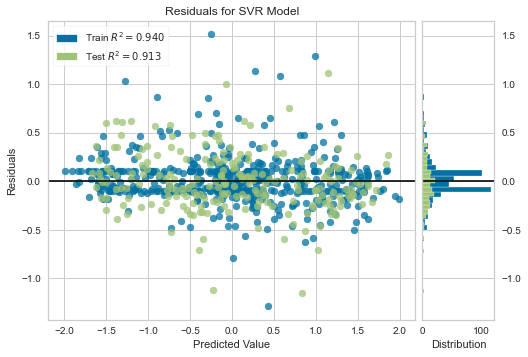

<AxesSubplot:title={'center':'Residuals for SVR Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [95]:
model = SVR()

# Residual Plot 

visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data

visualizer.show()                 # Finalize and render the figure

### Support Vector Regressor Model Evaluation

In [98]:
# Predict using train data

svr_y_train_predict = svr.predict(X_train)

In [100]:
# Train data R2 Score

svr_r2_value_train= r2_score(y_train,svr_y_train_predict) 
svr_r2_value_train

0.9398057072707023

In [102]:
# Predict using test data

svr_y_test_predict = svr.predict(X_test)

In [103]:
# Test data R2 Score

svr_r2_value_test = r2_score(y_test,svr_y_test_predict)
svr_r2_value_test

0.9125372194038157

## Model-4: Random Forest Regressor

In [106]:
# Importing Random Forest Regressor model library

from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(random_state=35)

In [107]:
# Training the Random Forest Regressor model

RF.fit(X_train,y_train)

RandomForestRegressor(random_state=35)

In [108]:
# Predict using test dataset

RF_y_predict=RF.predict(X_test)

### Random Forest Regressor Model Evaluation

In [109]:
# Test data R2 Score

RF_test_r2_score = r2_score(y_test,RF_y_predict)
RF_test_r2_score

0.8987951729276654

In [110]:
# Predict using train data
RF_y_train_predict=RF.predict(X_train)

# Test data R2 Score
RF_train_r2_score = r2_score(y_train,RF_y_train_predict)
RF_train_r2_score

0.9813323767397043

### _Hyperparameter Tunning of Random Forest Model_

In [111]:
parameters ={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
     'criterion':["squared_error"],      
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1,2,4],
     'min_samples_split': [2,5,10],
     'n_estimators': [50,100,200,300,400],
     'bootstrap':[True, False],     
      'random_state':[35,42]}
from sklearn.model_selection import ParameterGrid
param_size = ParameterGrid(parameters)
len(param_size)

3600

- Best Params:  {'bootstrap': False, 'criterion': 'squared_error', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50, 'random_state': 35}


In [113]:
RF1 = RandomForestRegressor(bootstrap=False, criterion='squared_error', max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=35)

In [114]:
# Training tuned random forest model using train dataset

RF1.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                      min_samples_split=5, n_estimators=50, random_state=35)

In [115]:
# Predict using tuned random forest model

RF1_y_predict=RF1.predict(X_test)

### Tuned Random Forest Regressor Model Evaluation

In [116]:
# Test data R2 Score

RF1_test_r2_score = r2_score(y_test,RF1_y_predict) # 0.9001279699432371
RF1_test_r2_score

0.8949044212479059

In [117]:
# Predict train data using tuned random forest model

RF1_y_train_predict=RF1.predict(X_train)

# Train data R2 Score

RF1_train_r2_score = r2_score(y_train,RF1_y_train_predict) # 0.9912964166777534
RF1_train_r2_score

0.9915283876910365

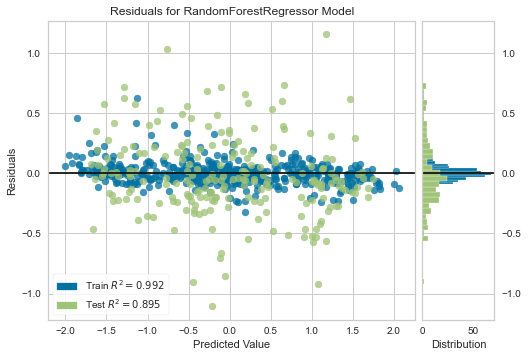

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [118]:
# Residual Plot

visualizer = ResidualsPlot(RF1)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data

visualizer.show()

## Model-5: Gradient Boosting

In [119]:
## importing the Gradient oosting Regressor model library

from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor() ## object creation
gbr.fit(X_train,y_train) ## fitting the data

GradientBoostingRegressor()

In [120]:
# predict using train data

gbr_y_train_predict = gbr.predict(X_train)

In [121]:
# predict using test data

gbr_y_test_predict = gbr.predict(X_test)

### Gradient Boosting Model Evaluation

In [150]:
# Test data R2 Score

gbr_r2_value_test = r2_score(y_test,gbr_y_test_predict)
gbr_r2_value_test

0.8930052237033882

In [122]:
# Train data R2 Score

gbr_r2_value_train = r2_score(y_train,gbr_y_train_predict)
gbr_r2_value_train

0.9604748904719792

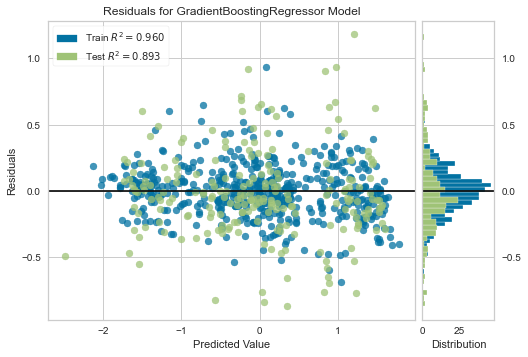

<AxesSubplot:title={'center':'Residuals for GradientBoostingRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [123]:
# Residual Plot

visualizer = ResidualsPlot(gbr)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data

visualizer.show()

## Model-6: XGB Regressor

In [126]:
# Importing XGB Regressor model Library

from xgboost import XGBRegressor

xgb=XGBRegressor() ## object creation
xgb.fit(X_train,y_train)# fitting the data

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [127]:
# Predict using train data
xgb_y_train_predict = xgb.predict(X_train)

In [128]:
# Predict using train data
xgb_y_test_predict = xgb.predict(X_test)

### XGB Regressor Model Evaluation

In [129]:
# Train data R2 Score
xgb_r2_value_train = r2_score(y_train,xgb_y_train_predict)
xgb_r2_value_train

0.9999533334714373

In [130]:
# Test data R2 Score
xgb_r2_value_test = r2_score(y_test,xgb_y_test_predict)
xgb_r2_value_test

0.8820360156071417

### Hyperparameter Tunning in XGB Regressor

In [131]:
xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [132]:
from sklearn.model_selection import GridSearchCV

params = {'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.2],
              'reg_alpha': [0.2,0.4,0.8,1.6],
              'max_depth': [3,6],
              'n_estimators': [50,100,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6],
              'gamma': [0,0.1,0.2,0.4,0.8,1.6]}
# gamma --- It is for Tree prunning 
# reg_alpha and req_lambda ---- are for Regularization to make model free from overfitting 
#n_estimators--number of decision tree]
from sklearn.model_selection import ParameterGrid
param_size = ParameterGrid(params)
len(param_size)

4320

- Best Params:  {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 0.8, 'reg_lambda': 0.4}

In [135]:
# Fitting the tuned XGBRegressor model

XGB_tuned=XGBRegressor(reg_lambda= 0.4, reg_alpha=0.8, n_estimators=200, max_depth=3, learning_rate=0.2, gamma=0)
XGB_tuned.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [136]:
# Predict using train data
XGB_tuned_y_train_predict = XGB_tuned.predict(X_train)

In [137]:
# Predict using test data
XGB_tuned_y_test_predict = XGB_tuned.predict(X_test)

### Tuned XGB Regressor Model Evaluation

In [138]:
# Train data R2 Score

XGB_tuned_r2_value_train = r2_score(y_train,XGB_tuned_y_train_predict)
XGB_tuned_r2_value_train

0.9763626635229604

In [139]:
# Test data R2 Score

XGB_tuned_r2_value_test = r2_score(y_test,XGB_tuned_y_test_predict)
XGB_tuned_r2_value_test

0.9003948379584154

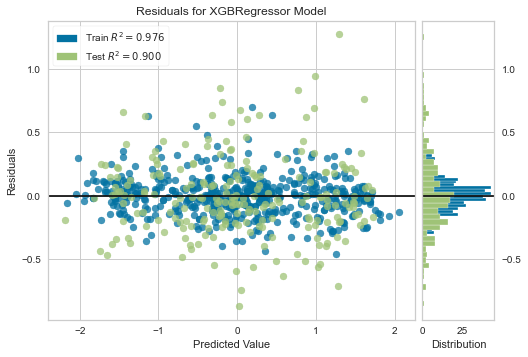

<AxesSubplot:title={'center':'Residuals for XGBRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [140]:
# Residual Plot

visualizer = ResidualsPlot(XGB_tuned)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data

visualizer.show()

## SUMMARY

This dataset contains the daily count of rental bikes between years 2011 and 2012 from the bicycle rental company Capital bikeshare system with the corresponding weather and seasonal information. Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.
This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. 

The Primary objective is to build a statistical model to predict the number of bicycls that can be rented with the availability of the data and understand the trends and environmental and seasonal factors that may be affecting the rented bike counts.

**METHODOLOGY FOLLOWED**


> The dataset contains daily ridership data of the Capital Bikeshare system company for the years 2011 and 2012. There are 731 observations in total, where the data of each day is recorded as a single observation with 14 variables.

> Exploratory data analysis has been carried out in order to get the relations of each independent and dependent variables.

> The normalized features has been denormalized to have a better insights from the data. 

> The dataset did not contain any missing values.

> Feature Humidity and Windspeed shows some outliers which has been handled using quantile based capping.

> Correlation of Independent and dependent features has been captured using heatmap.

> Various regression models has been studied and evaluated.

> Performance of some models has been improved using hyperparameter tuning. 


**INSIGHTS FROM EDA:**

> The overall distribution on the demand of  bike rental shows a normal distribution with a peak in the summer season. Bike rentals greatly decrease during winter and increase during the summer, spring, and fall.

> Bike rentals during workdays are more common than during non-working days.

> The registered members uses rented bikes in a large proportion than made by casual users.

> The proportion of casual and registered users changes over the month of the year, with a larger proportion of users in both group uses in non-winter months. 

> Year 2012 had more riders in general, and the proportions stayed the same in terms of rides being from registered versus non-registered users.
This could be due to gain in popularity of bike program, the bike riders are using it at similar proportions across the two years and that the bikes are not just being exclusively used by one type of rider after the first year.


> A clear weather shows a high demand in the bike rental than any other weather condition.

> Humidity, Temperature, Feel Temperature and windspeed

> Humidity level of 50 to 70 percent shows a high demand in rental bike users.

> Windspeed of 10 to 15 kmph shows a high demand in rental bike users

> Humidity and windspeed shows a negative correlation with total count of rental bikes.

> Temperature range of 18 to 25 deg Celsius which is the comfortable temperature shows a high demand in rental bikes.

> Temperature and Feel Temperature shows a positive correlation with total count of rental bikes.


**INSIGHTS FROM REGRESSION MODELS:**

A regression is a statistical technique that relates a dependent variable to one or more independent (explanatory) variables. 
A regression model is able to show whether changes observed in the dependent variable are associated with changes in one or more of the explanatory variables.

Six regression models has been studied for this dataset and evaluated the model on different metrics which helps us to better optimize the performance, fine-tune it, and obtain a better result.

***Model-1: Linear Regression***
> The linear regression model did not perform well as compared to other regression models studied. For Linear regression, the  R2 score for test and train data were 0.837 and 0.78. R-Square Value is the goodness-of-fit and a statistical measure of how close the data are fitted to the regression line. 

***Model-2: Desicion Tree Regressor***
> For Desicion Tree Regressor model, the  R2 score for test and train data were 0.817 and 1. The parameters of decision tress regressor model has been tuned using hyperparameter tuning. After the tuning process, the R2 score were 0.83 for test data and 0.88 for the train data.

***Model-3: Support Vector Regressor***
> For Support Vector Regressor model, the  R2 score for test and train data were 0.919 and 0.982. 

***Model-4: Random Forest Regressor***
> For Random Forest Regressor model, the  R2 score for test and train data were 0.898 and 0.981. The parameters of Random Forest regressor model has been tuned using hyperparameter tuning. After the tuning process, the R2 score were 0.894 for test data and 0.991 for the train data.

***Model-5: Gradient Boost Regressor***
> For Gradient Boost Regressor model, the  R2 score for test and train data were 0.893 and 0.960.

***Model-6: XGB Regressor***
> For XGB Regressor model, the  R2 score for test and train data were 0.88 and 0.999. The parameters of XGB regressor model has been tuned using hyperparameter tuning. After the tuning process, the R2 score were 0.99 for test data and 0.976 for the train data.

**Residual Plot**
> A residual plot is also drawn for each model which shows the difference/residuals between the actual and the predicted values. A residual is a measure of how far away a point is vertically from the regression line. Simply, it is the error between a predicted value and the observed actual value.

**CONCLUSION:**

From EDA, the ideal condition for having a higher demands for bike rental is in summer months than in winter months, where the demand increases and decreases are gradual by months. Due to gain in popularity of bike rental program, the demand in the year 2012 is more compared to the year 2011. Registered users prefer to ride the bike more on weekdays whearas casual user prefer more on weekends and holidays. Weather is another factor that has a detrimental impact on the demand of the rental bikes.A clear weather shows a high demand in the bike rental than any other weather condition.

The Support Vector Regressor Model has given a better R2 Score compared to other regression models and hence we have choosen Support Vector Regressor Model for production 

**CHALLENGES FACED:** 

> The feature Humidity and Windspeed showed some outliers which has been handled using keeping, trimming and recode. All three methods actually gave the same results in the regression models. Hence we have gone with quantile based capping for outliers handling.

> During the feature selection process, the features such as feel temperature, casual and registered were highly correlated with the dependent variable and hence has been dropped from the analysis.

> Encoding of the categorical features such as label encoding and one hot encoding give approximately the same performnce on every models.

> The parameters of various models for using in hyperparameter tuning was not computationaly efficient.
